In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('C:\\Users\\fangc\\Documents\\airbnb\\Airbnb Project')
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df=pd.read_excel('Guest_2018.xlsx')

In [90]:
# to check the quantity of data
df.shape[0]

362

In [91]:
print('There are {} data rows'.format(df.shape[0]))

There are 362 data rows


In [92]:
#Text convert to quantity data
df_text=list(df.text)

In [93]:
# check if the lengh of list is equal to the quantity of data
len(df_text)

362

In [70]:
# import countvectorizer for count the word of guest greeting
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(df_text)

In [71]:
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=["I'm a Tesla contractor and I need a place to stay for next few months. I'll be there alone for most of the time but I selected two guest because my girlfriend will join me for some time.  I'm looking forward for your answer!", 'We would like to know whether you have 2 parking spaces for us, ...hecking your post in airbnb. Could you please send me the pictures of the house for me to confirm.'],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [72]:
count_vector.fit(df_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=["I'm a Tesla contractor and I need a place to stay for next few months. I'll be there alone for most of the time but I selected two guest because my girlfriend will join me for some time.  I'm looking forward for your answer!", 'We would like to know whether you have 2 parking spaces for us, ...hecking your post in airbnb. Could you please send me the pictures of the house for me to confirm.'],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [73]:
# preparing the maxtrix
import numpy as np
doc_array =count_vector.transform(df_text).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
frequency_matrix = pd.DataFrame(doc_array,columns=count_vector.get_feature_names())

In [75]:
#make a dataframe
count_word=frequency_matrix.sum(axis=1)
count_word=pd.DataFrame(count_word,columns=['count_words'])


In [76]:
#assigned new column
df['Text_counts']=count_word

In [77]:
# change data type
df['Start date']=pd.to_datetime(df['Start date'])
df['End date']=pd.to_datetime(df['End date'])
df['Booked']=pd.to_datetime(df['Booked'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 16 columns):
Confirmation code    362 non-null object
Status               362 non-null object
Guest name           362 non-null object
Contact              362 non-null object
# of adults          362 non-null int64
Start date           362 non-null datetime64[ns]
End date             362 non-null datetime64[ns]
# of nights          362 non-null int64
Booked               362 non-null datetime64[ns]
Booked_aheadday      362 non-null int64
Listing              362 non-null object
Earnings             362 non-null float64
Bad                  362 non-null int64
review               362 non-null int64
text                 362 non-null object
Text_counts          362 non-null int64
dtypes: datetime64[ns](3), float64(1), int64(6), object(6)
memory usage: 45.3+ KB


In [79]:
# change the data type
df['day_of_week_checkin'] = df['Start date'].dt.day_name()
df['day_of_week_checkout'] = df['End date'].dt.day_name()
df['book_day_of_week'] = df['Booked'].dt.day_name()

In [80]:
df.head()

,Confirmation code,Status,Guest name,Contact,# of adults,Start date,End date,# of nights,Booked,Booked_aheadday,Listing,Earnings,Bad,review,text,Text_counts,day_of_week_checkin,day_of_week_checkout,book_day_of_week
0,HMQM5YMPQC,Confirmed,Lukasz Majewski,'+48 793 641 008,2,2017-12-17,2018-02-28,73,2017-12-04,13,FULLY Furnished Silicon Valley Studio House,4764.41,0,1,I'm a Tesla contractor and I need a place to s...,38,Sunday,Wednesday,Monday
1,HM33MPJPAH,Confirmed,Betty Tse,'+1 (650) 996-3949,2,2017-12-18,2018-01-01,14,2017-11-14,34,Silicon Valley Entire Clean Modern 2B/2B Apart...,2227.12,0,1,We would like to know whether you have 2 parki...,18,Monday,Monday,Tuesday
2,HMTNHF3BTP,Confirmed,Chen-Ying Huang,'+886 911 064 245,2,2018-01-01,2018-01-03,2,2017-12-28,4,Silicon Valley Entire Clean Modern 2B/2B Apart...,383.15,0,1,This is Jane from Taiwan. I will go business t...,27,Monday,Wednesday,Thursday
3,HM34DBFBE4,Confirmed,Jeanie Jones,'+1 (530) 816-9026,3,2018-02-04,2018-02-08,4,2018-02-04,0,Bay area Entire Luxury 1bedroom 1 bathroom,579.75,0,0,I am interested in renting your apartment. It ...,51,Sunday,Thursday,Sunday
4,HM4TCEP3KF,Confirmed,Miya Zhao,'+86 186 0061 3291,2,2018-02-10,2018-02-13,3,2018-02-09,1,Bay area Entire Luxury 1bedroom 1 bathroom,449.11,0,3,"Hi, I’m traveling to Bay Area theses days, I’d...",13,Saturday,Tuesday,Friday


# Data Exploration

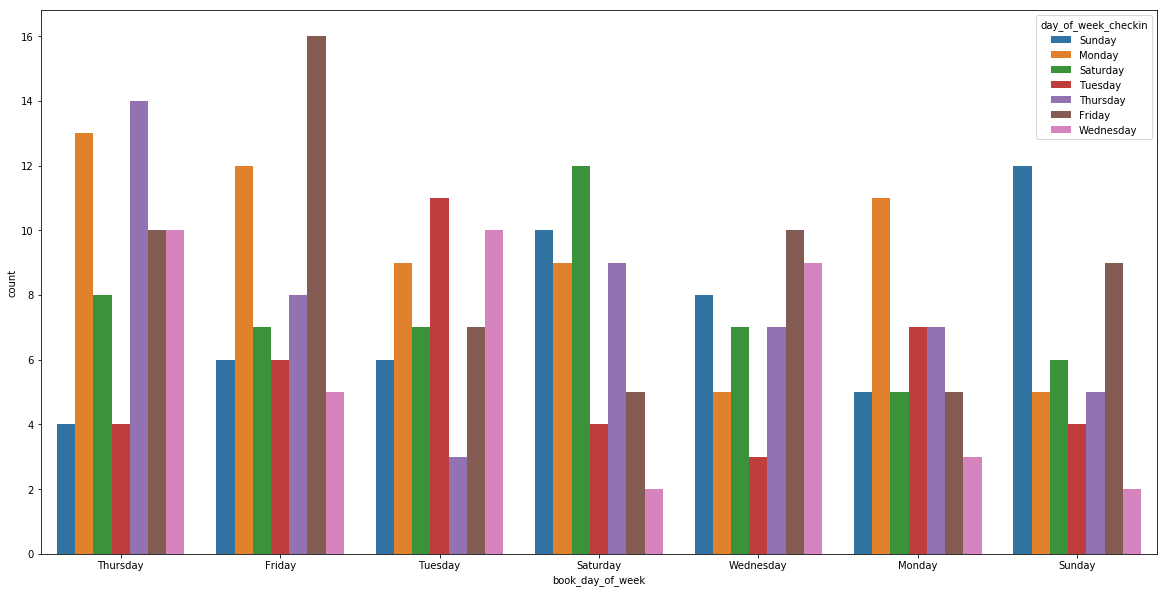

In [81]:
import seaborn as sns
# To see the check in day of week that people book in a certain day of week. 
plt.figure(figsize=(20,10))
sns.countplot(x='book_day_of_week',hue='day_of_week_checkin',data=df,order = df['book_day_of_week'].value_counts().index)


People who booked a place by Thursday are more likely to check in by same day, Monday, Friday, Wednesday.

People who booked a place by Friday are more likely to check in by same day, Monday, Thursday.

People who booked a place by Tuesday are more likely to check in by same day or Wednesday. 

People who booked a place by Saturday are more likely to check in by same day or Sunday.

People who booked a place by Wednesday are more likely to check in by Friday or same day.

People who booked a place by Monday are more likely to check in by Tuesday, Thursday or same day.

People who booked a place by Sunday are more likely to check in by same day or Friday.

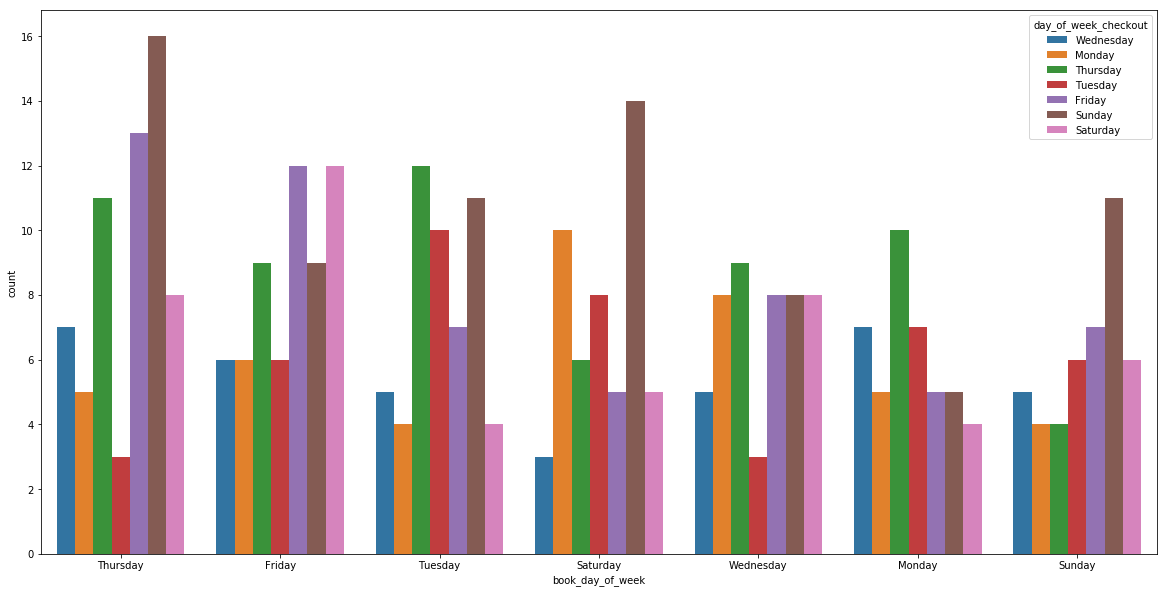

In [82]:
# To see the check out day of week that people book in a certain day of week.
plt.figure(figsize=(20,10))
sns.countplot(x='book_day_of_week',hue='day_of_week_checkout',data=df,order = df['book_day_of_week'].value_counts().index)


In [83]:
# To see the frequency day of week people check out
df.book_day_of_week.value_counts()

Thursday     63
Friday       60
Tuesday      53
Saturday     51
Wednesday    49
Monday       43
Sunday       43
Name: book_day_of_week, dtype: int64

Thursday and Friday is the most day of week people are willing to make a plan to book the place. so We can give some discount for a closest dates.

C:\Users\fangc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


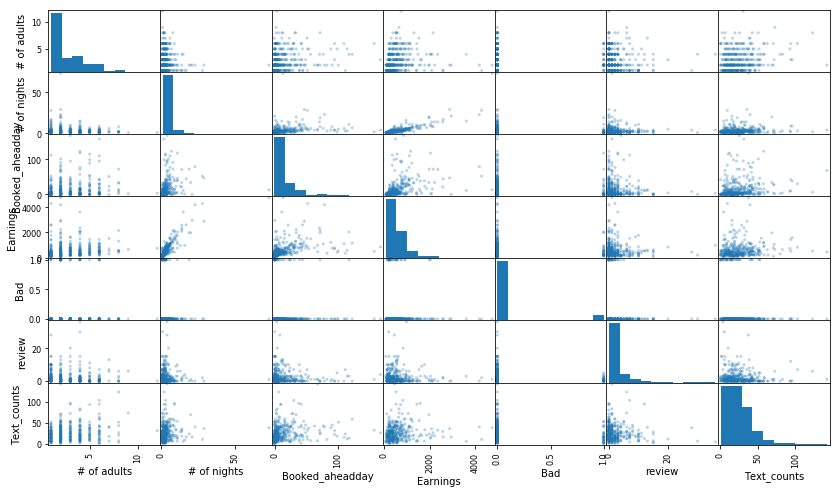

In [84]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8));

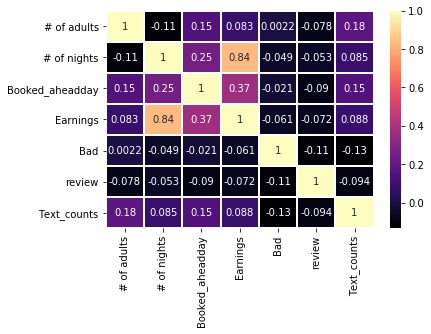

In [85]:
# using heatmap to see if they have correlation
import seaborn as sns
sns.heatmap(df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

According to the heatmap of correlation, 
those numerical features have no relationship for each other except the 'number of nights' and 'Earnings' has a strong relationship which is obvious.
I was expecting to see a relationship with 'Booked_aheadday' and ''# of nights'. However, there is only 0.25 R^2 score.

In [86]:
# find the listing name to assign the size of the property
df.Listing.unique()

array(['FULLY Furnished Silicon Valley Studio House',
       'Silicon Valley Entire Clean Modern 2B/2B Apartment',
       'Bay area Entire Luxury  1bedroom 1 bathroom',
       'Silicon Valley Brand new Private room (Newark) æ¬¢è¿Ž',
       'Fully Furnished-Clean Cozy 3Bed2Bath House',
       'Silicon Valley 2000 SQ/FT Luxury 3B/2.5B Condo',
       'Cozy House in Center Fremont',
       'Relaxing Bay area style cozy place',
       'Cozy House in Downtown Fremont',
       'Milpitas Master bedroom with Private Bathroom',
       'Beautiful spacious  3 bdrm 1 officerm luxury home',
       'Independent house with two bed rooms for move in'], dtype=object)

In [87]:
# assign the size 
df.loc[(df.Listing =='FULLY Furnished Silicon Valley Studio House')|(df.Listing=='Bay area Entire Luxury  1bedroom 1 bathroom')|(df.Listing=='Silicon Valley Brand new Private room (Newark) æ¬¢è¿Ž')|(df.Listing=='Relaxing Bay area style cozy place')|(df.Listing=='Milpitas Master bedroom with Private Bathroom')|(df.Listing=='Independent house with two bed rooms for move in'),'size']='small'
df.loc[(df.Listing =='Silicon Valley Entire Clean Modern 2B/2B Apartment')|(df.Listing=='Cozy House in Downtown Fremont'),'size']='middle'
df.loc[(df.Listing == 'Fully Furnished-Clean Cozy 3Bed2Bath House')|(df.Listing=='Silicon Valley 2000 SQ/FT Luxury 3B/2.5B Condo')|(df.Listing=='Beautiful spacious  3 bdrm 1 officerm luxury home'),'size']='large'

In [94]:
# the final_ clean data
df.head()

,Confirmation code,Status,Guest name,Contact,# of adults,Start date,End date,# of nights,Booked,Booked_aheadday,Listing,Earnings,Bad,review,text,Text_counts,day_of_week_checkin,day_of_week_checkout,book_day_of_week,size
0,HMQM5YMPQC,Confirmed,Lukasz Majewski,'+48 793 641 008,2,2017-12-17,2018-02-28,73,2017-12-04,13,FULLY Furnished Silicon Valley Studio House,4764.41,0,1,I'm a Tesla contractor and I need a place to s...,38,Sunday,Wednesday,Monday,small
1,HM33MPJPAH,Confirmed,Betty Tse,'+1 (650) 996-3949,2,2017-12-18,2018-01-01,14,2017-11-14,34,Silicon Valley Entire Clean Modern 2B/2B Apart...,2227.12,0,1,We would like to know whether you have 2 parki...,18,Monday,Monday,Tuesday,middle
2,HMTNHF3BTP,Confirmed,Chen-Ying Huang,'+886 911 064 245,2,2018-01-01,2018-01-03,2,2017-12-28,4,Silicon Valley Entire Clean Modern 2B/2B Apart...,383.15,0,1,This is Jane from Taiwan. I will go business t...,27,Monday,Wednesday,Thursday,middle
3,HM34DBFBE4,Confirmed,Jeanie Jones,'+1 (530) 816-9026,3,2018-02-04,2018-02-08,4,2018-02-04,0,Bay area Entire Luxury 1bedroom 1 bathroom,579.75,0,0,I am interested in renting your apartment. It ...,51,Sunday,Thursday,Sunday,small
4,HM4TCEP3KF,Confirmed,Miya Zhao,'+86 186 0061 3291,2,2018-02-10,2018-02-13,3,2018-02-09,1,Bay area Entire Luxury 1bedroom 1 bathroom,449.11,0,3,"Hi, I’m traveling to Bay Area theses days, I’d...",13,Saturday,Tuesday,Friday,small


In [89]:
df.to_csv(r'C:\Users\fangc\Documents\airbnb\Airbnb Project\clean_data.csv',index=False)